In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics

In [2]:

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm

# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

# Importing train-test-split 
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn.metrics import *

# Ignoring warning
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
data = pd.read_csv('bank.csv')

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
data.shape

(41188, 20)

In [6]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [9]:
df_filtered = data[data['pdays'] == 999]
df_filtered.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
df_filtered.shape

(39673, 20)

In [11]:
df_filtered['poutcome'].value_counts()

nonexistent    35563
failure         4110
Name: poutcome, dtype: int64

In [12]:
df_filtered['previous'].value_counts()

0    35563
1     3696
2      349
3       50
4       12
5        2
6        1
Name: previous, dtype: int64

# success rate is zero for people who were not contacted frequently for another campaign.

In [13]:
df_filtered['y'].value_counts()

no     36000
yes     3673
Name: y, dtype: int64

# Very less peple subsribed for the campaign from people who were not contacted for a long time.

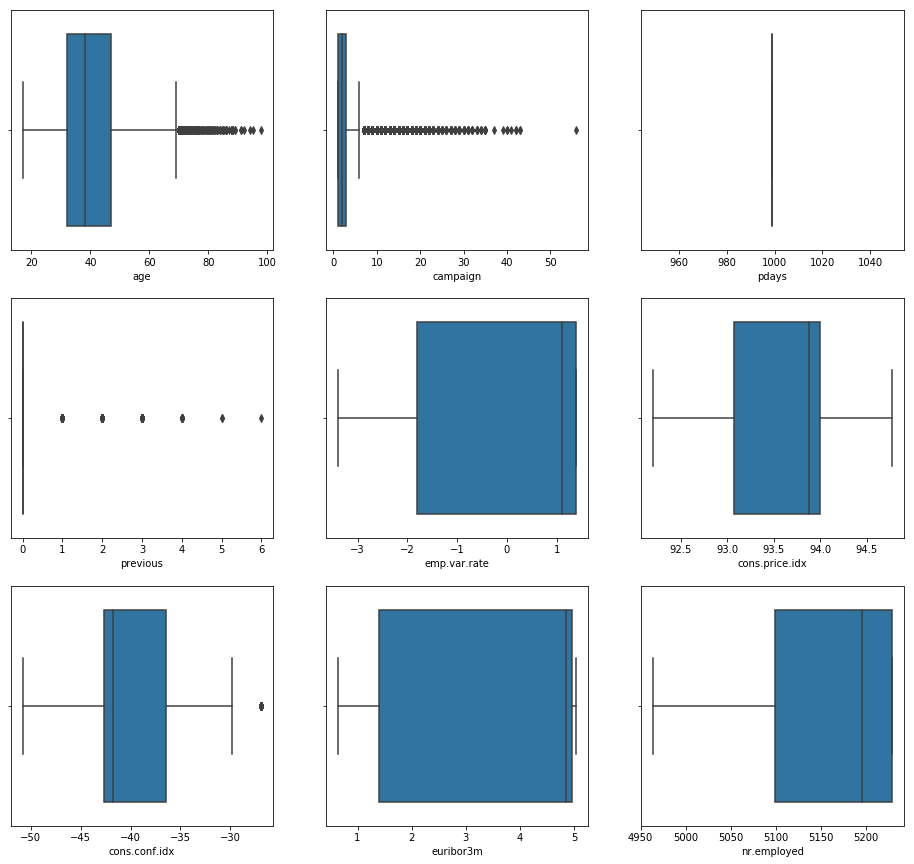

In [14]:
fig , axes = plt.subplots(3,3,figsize =(16,15))
sns.boxplot(df_filtered['age'],ax = axes[0,0])
sns.boxplot(df_filtered['campaign'],ax = axes[0,1])
sns.boxplot(df_filtered['pdays'],ax = axes[0,2])
sns.boxplot(df_filtered['previous'],ax = axes[1,0])
sns.boxplot(df_filtered['emp.var.rate'],ax = axes[1,1])
sns.boxplot(df_filtered['cons.price.idx'],ax = axes[1,2])
sns.boxplot(df_filtered['cons.conf.idx'],ax = axes[2,0])
sns.boxplot(df_filtered['euribor3m'],ax = axes[2,1])
sns.boxplot(df_filtered['nr.employed'],ax = axes[2,2])
plt.show()

In [15]:
education = pd.crosstab(df_filtered['default'],df_filtered['y'])
education

y,no,yes
default,,
no,27877,3260
unknown,8120,413
yes,3,0


In [16]:
remove = df_filtered[df_filtered['default']=='yes']
remove

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21580,48,technician,married,professional.course,yes,no,no,cellular,aug,tue,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
21581,48,technician,married,professional.course,yes,yes,no,cellular,aug,tue,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
24866,31,unemployed,married,high.school,yes,no,no,cellular,nov,tue,2,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no


In [17]:
df_filtered.shape

(39673, 20)

In [18]:
len(df_filtered)

39673

In [19]:
df_filtered.drop(remove.index,inplace=True)

In [20]:
df_filtered.shape

(39670, 20)

In [21]:
len(df_filtered)

39670

In [22]:
dataset = df_filtered.copy()

In [23]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [24]:
len(dataset)

39670

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39670 entries, 0 to 41187
Data columns (total 20 columns):
age               39670 non-null int64
job               39670 non-null object
marital           39670 non-null object
education         39670 non-null object
default           39670 non-null object
housing           39670 non-null object
loan              39670 non-null object
contact           39670 non-null object
month             39670 non-null object
day_of_week       39670 non-null object
campaign          39670 non-null int64
pdays             39670 non-null int64
previous          39670 non-null int64
poutcome          39670 non-null object
emp.var.rate      39670 non-null float64
cons.price.idx    39670 non-null float64
cons.conf.idx     39670 non-null float64
euribor3m         39670 non-null float64
nr.employed       39670 non-null float64
y                 39670 non-null object
dtypes: float64(5), int64(4), object(11)
memory usage: 6.4+ MB


# Applying get dummies 

In [26]:
data = pd.get_dummies(dataset,drop_first=True)
data.shape

(39670, 51)

In [27]:
data.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,y_yes
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0


In [29]:
data.to_csv('rawdata.csv', index=False)

In [28]:
data['y_yes'].value_counts()

0    35997
1     3673
Name: y_yes, dtype: int64

# standardization

In [29]:

df = data[['campaign', 'previous',
        'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed']]
transformed_data = (df-df.mean())/df.std()
data_bank = data.drop(['campaign',  'previous',
        'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],1)
data_bank = pd.concat([data_bank,transformed_data],axis=1)

In [146]:
data_bank.head()

,age,pdays,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,day_of_week_wed,poutcome_nonexistent,y_yes,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,999,0,0,1,0,0,0,0,0,...,0,1,0,-0.5684,-0.318201,0.610223,0.721158,0.927173,0.673929,0.276926
1,57,999,0,0,0,0,0,0,1,0,...,0,1,0,-0.5684,-0.318201,0.610223,0.721158,0.927173,0.673929,0.276926
2,37,999,0,0,0,0,0,0,1,0,...,0,1,0,-0.5684,-0.318201,0.610223,0.721158,0.927173,0.673929,0.276926
3,40,999,0,0,0,0,0,0,0,0,...,0,1,0,-0.5684,-0.318201,0.610223,0.721158,0.927173,0.673929,0.276926
4,56,999,0,0,0,0,0,0,1,0,...,0,1,0,-0.5684,-0.318201,0.610223,0.721158,0.927173,0.673929,0.276926


In [147]:
x_data = data_bank.drop('y_yes',1)
y_data = data_bank['y_yes']

# Building base models

In [148]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_data,y_data, train_size=0.7,test_size=0.3,random_state=100,stratify=y_data)

In [149]:
x_train_1.shape

(27769, 50)

In [150]:
x_test_1.shape

(11901, 50)

In [151]:
lo = LogisticRegression()
m = lo.fit(x_train_1,y_train_1)
p = lo.predict(x_test_1)

In [152]:
print(f1_score(y_test_1,p))

0.11138014527845036


In [153]:
cf = metrics.confusion_matrix(y_test_1,p)
cf

array([[10731,    68],
       [ 1033,    69]], dtype=int64)

In [154]:
TN = cf[0,0] # true positive 
TP = cf[1,1] # true negatives
FP = cf[0,1] # false positives
FN = cf[1,0] # false negatives

In [155]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
print(accuracy)

0.9074867658179985


In [156]:
Misclassification  = 1-accuracy
Misclassification

0.09251323418200152

In [157]:
print(classification_report(y_test_1,p))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10799
           1       0.50      0.06      0.11      1102

   micro avg       0.91      0.91      0.91     11901
   macro avg       0.71      0.53      0.53     11901
weighted avg       0.87      0.91      0.87     11901



# Decision tree model

In [158]:
tree = DecisionTreeClassifier()
model_tre = tree.fit(x_train_1,y_train_1)
pred_tree  = tree.predict(x_test_1)

In [159]:
print(accuracy_score(y_test_1,pred_tree))

0.8492563650113436


In [160]:
print(f1_score(y_test_1,pred_tree))

0.23659574468085107


In [161]:
ct = metrics.confusion_matrix(y_test_1,pred_tree)
ct

array([[9829,  970],
       [ 824,  278]], dtype=int64)

In [162]:
TN_t = ct[0,0] # true positive 
TP_t = ct[1,1] # true negatives
FP_t = ct[0,1] # false positives
FN_t = ct[1,0] # false negatives

In [163]:
accuracy_t = (TP_t+TN_t)/(TP_t+TN_t+FP_t+FN_t)
print(accuracy_t)

0.8492563650113436


In [164]:
Misclassification  = 1-accuracy_t
Misclassification

0.1507436349886564

In [165]:
print(classification_report(y_test_1,pred_tree))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     10799
           1       0.22      0.25      0.24      1102

   micro avg       0.85      0.85      0.85     11901
   macro avg       0.57      0.58      0.58     11901
weighted avg       0.86      0.85      0.85     11901



# Random forest model

In [166]:
random = RandomForestClassifier()
model_rf = random.fit(x_train_1,y_train_1)
pred_rf  = random.predict(x_test_1)

In [167]:
print(f1_score(y_test_1,pred_rf))

0.20990099009900992


In [168]:
cr = metrics.confusion_matrix(y_test_1,pred_rf)
cr

array([[10545,   254],
       [  943,   159]], dtype=int64)

In [169]:
TN_r = cr[0,0] # true positive 
TP_r = cr[1,1] # true negatives
FP_r = cr[0,1] # false positives
FN_r = cr[1,0] # false negatives

In [170]:
accuracy_rf = (TP_r+TN_r)/(TP_r+TN_r+FP_r+FN_r)
print(accuracy_rf)

0.8994202167885051


In [171]:
Misclassification_r  = 1-accuracy_rf
Misclassification_r

0.10057978321149486

In [172]:
print(classification_report(y_test_1,pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10799
           1       0.38      0.14      0.21      1102

   micro avg       0.90      0.90      0.90     11901
   macro avg       0.65      0.56      0.58     11901
weighted avg       0.87      0.90      0.88     11901



In [173]:
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.feature_selection import RFE

In [174]:
# Logistic regression model
logm1 = sm.GLM(y_train_1,(sm.add_constant(x_train_1)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  y_yes   No. Observations:                27769
Model:                            GLM   Df Residuals:                    27720
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7269.3
Date:                Tue, 16 Apr 2019   Deviance:                       14539.
Time:                        15:48:33   Pearson chi2:                 2.82e+04
No. Iterations:                     6   Covariance Type:             nonrobust
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
age                              -0.0022      0.003     -0.826      0.409      -0.008       0.003
pdays                            -0.0023      0.000     -9.310      0.000      -0.003      -0.002
job_blue-collar                  -0.1671      0.086     -1.944      0.052      -0.336       0.001
job_entrepreneur                 -0.0600      0.133     -0.453      0.651      -0.320       0.200
job_housemaid                    -0.1302      0.164     -0.795      0.426      -0.451       0.191
job_management                   -0.1405      0.097     -1.450      0.147      -0.330       0.049
job_retired                       0.3322      0.120      2.763      0.006       0.097       0.568
job_self-employed                 0.0086      0.123      0.071      0.944      -0.231       0.249
job_services                     -0.2607      0.097     -2.699      0.007      -0.450      -0.071
job_student                       0.1498      0.131      1.140      0.254      -0.108       0.407
job_technician                   -0.0433      0.078     -0.555      0.579      -0.196       0.110
job_unemployed                   -0.0700      0.147     -0.477      0.634      -0.358       0.218
job_unknown                       0.0236      0.280      0.084      0.933      -0.526       0.573
marital_married                   0.1273      0.078      1.629      0.103      -0.026       0.281
marital_single                    0.2162      0.088      2.458      0.014       0.044       0.389
marital_unknown                   0.3638      0.520      0.699      0.484      -0.656       1.383
education_basic.6y                0.0889      0.130      0.685      0.493      -0.165       0.343
education_basic.9y               -0.0373      0.102     -0.364      0.715      -0.238       0.163
education_high.school             0.0189      0.101      0.187      0.852      -0.179       0.217
education_illiterate              0.9679      0.727      1.332      0.183      -0.456       2.392
education_professional.course     0.0587      0.111      0.529      0.597      -0.159       0.276
education_university.degree       0.0780      0.101      0.773      0.439      -0.120       0.276
education_unknown                -0.0064      0.133     -0.048      0.961      -0.268       0.255
default_unknown                  -0.1879      0.070     -2.676      0.007      -0.326      -0.050
housing_unknown                  -0.1738      0.081     -2.146      0.032      -0.333      -0.015
housing_yes                      -0.0606      0.045     -1.337      0.181      -0.150       0.028
loan_unknown                     -0.1738      0.081     -2.146      0.032      -0.333      -0.015
loan_yes                         -0.1336      0.065     -2.067      0.039      -0.260      -0.007
contact_telephone                -0.7452      0.087     -8.612      0.000      -0.915      -0.576
month_aug                 

In [175]:
data_bank.columns

Index(['age', 'pdays', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'y_yes', 'campaign',
       'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [176]:
x_data2 = x_data.drop(['age','euribor3m','job_entrepreneur', 'job_housemaid',
       'job_management','job_self-employed', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
     'marital_married','marital_unknown', 'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown',
     'housing_yes',  'month_jul','month_oct', 'month_sep','day_of_week_thu', 'day_of_week_tue','poutcome_nonexistent'],1)

In [177]:
logm2 = sm.GLM(y_data,(sm.add_constant(x_data2)), family = sm.families.Binomial())
model2 = logm2.fit()

In [178]:
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Generalized linear model
==================================================================
Model:               GLM              AIC:            20970.0872  
Link Function:       logit            BIC:            -398872.2456
Dependent Variable:  y_yes            Log-Likelihood: -10462.     
Date:                2019-04-16 15:48 LL-Null:        -12238.     
No. Observations:    39670            Deviance:       20924.      
Df Model:            22               Pearson chi2:   4.03e+04    
Df Residuals:        39647            Scale:          1.0000      
Method:              IRLS                                         
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
pdays             -0.0020   0.0000 -43.8679 0.0000 -0.0021 -0.0019
job_blue-collar   -0.1748   0.0520  -3.3619 0.0008 -0.2767 -0.0729
job_retired        0.2547   0.0774   3.2914 0.0010  0.1030  0.4064
job_services      -0.1527   0.0694  -2.1985 0.0279 -0.2888 -0.0166
marital_single     0.1252   0.0407   3.0800 0.0021  0.0455  0.2049
default_unknown   -0.2409   0.0577  -4.1735 0.0000 -0.3540 -0.1278
housing_unknown   -0.0647   0.0629  -1.0279 0.3040 -0.1881  0.0587
loan_unknown      -0.0647   0.0629  -1.0279 0.3040 -0.1881  0.0587
loan_yes          -0.0467   0.0526  -0.8887 0.3741 -0.1498  0.0563
contact_telephone -0.7645   0.0664 -11.5079 0.0000 -0.8947 -0.6343
month_aug          0.3840   0.0839   4.5762 0.0000  0.2195  0.5484
month_dec          0.5320   0.1887   2.8188 0.0048  0.1621  0.9019
month_jun         -0.7447   0.1049  -7.1022 0.0000 -0.9502 -0.5392
month_mar          1.5260   0.1169  13.0533 0.0000  1.2968  1.7551
month_may         -0.4922   0.0579  -8.5031 0.0000 -0.6056 -0.3787
month_nov         -0.4364   0.0717  -6.0866 0.0000 -0.5769 -0.2959
day_of_week_mon   -0.2186   0.0489  -4.4736 0.0000 -0.3143 -0.1228
day_of_week_wed    0.1154   0.0476   2.4248 0.0153  0.0221  0.2088
campaign          -0.1078   0.0257  -4.1992 0.0000 -0.1581 -0.0575
previous          -0.1541   0.0165  -9.3440 0.0000 -0.1864 -0.1218
emp.var.rate      -2.1847   0.1795 -12.1697 0.0000 -2.5366 -1.8329
cons.price.idx     1.2530   0.1064  11.7743 0.0000  1.0445  1.4616
cons.conf.idx      0.2050   0.0217   9.4420 0.0000  0.1624  0.2475
nr.employed        0.6515   0.1110   5.8690 0.0000  0.4339  0.8691
==================================================================

"""

In [179]:
x_data2 = x_data2.drop(['housing_unknown','loan_unknown','loan_yes'],1)

In [180]:
logm3 = sm.GLM(y_data,(sm.add_constant(x_data2)), family = sm.families.Binomial())
model3 = logm3.fit()

In [181]:
model3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Generalized linear model
==================================================================
Model:               GLM              AIC:            20967.8559  
Link Function:       logit            BIC:            -398891.6537
Dependent Variable:  y_yes            Log-Likelihood: -10463.     
Date:                2019-04-16 15:48 LL-Null:        -12238.     
No. Observations:    39670            Deviance:       20926.      
Df Model:            20               Pearson chi2:   4.03e+04    
Df Residuals:        39649            Scale:          1.0000      
Method:              IRLS                                         
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
pdays             -0.0020   0.0000 -44.9472 0.0000 -0.0021 -0.0019
job_blue-collar   -0.1746   0.0520  -3.3589 0.0008 -0.2765 -0.0727
job_retired        0.2552   0.0774   3.2982 0.0010  0.1035  0.4068
job_services      -0.1528   0.0694  -2.2006 0.0278 -0.2889 -0.0167
marital_single     0.1252   0.0407   3.0804 0.0021  0.0455  0.2049
default_unknown   -0.2406   0.0577  -4.1683 0.0000 -0.3537 -0.1274
contact_telephone -0.7637   0.0664 -11.4976 0.0000 -0.8939 -0.6335
month_aug          0.3837   0.0839   4.5738 0.0000  0.2193  0.5482
month_dec          0.5280   0.1886   2.7994 0.0051  0.1583  0.8977
month_jun         -0.7443   0.1049  -7.0977 0.0000 -0.9498 -0.5388
month_mar          1.5253   0.1169  13.0489 0.0000  1.2962  1.7544
month_may         -0.4931   0.0579  -8.5201 0.0000 -0.6065 -0.3796
month_nov         -0.4359   0.0717  -6.0794 0.0000 -0.5764 -0.2953
day_of_week_mon   -0.2183   0.0489  -4.4694 0.0000 -0.3141 -0.1226
day_of_week_wed    0.1155   0.0476   2.4262 0.0153  0.0222  0.2088
campaign          -0.1082   0.0257  -4.2133 0.0000 -0.1586 -0.0579
previous          -0.1542   0.0165  -9.3509 0.0000 -0.1866 -0.1219
emp.var.rate      -2.1815   0.1795 -12.1539 0.0000 -2.5333 -1.8297
cons.price.idx     1.2513   0.1064  11.7603 0.0000  1.0427  1.4598
cons.conf.idx      0.2047   0.0217   9.4299 0.0000  0.1621  0.2472
nr.employed        0.6494   0.1110   5.8508 0.0000  0.4318  0.8669
==================================================================

"""

# Feature elimination

In [182]:
logreg = LogisticRegression()
rfe = RFE(logreg, 13)             # running RFE with 20 variables as output
rfe = rfe.fit(x_data2,y_data)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[False False  True False False  True  True  True  True  True  True  True
  True  True False False False  True  True False  True]
[9 3 1 4 6 1 1 1 1 1 1 1 1 1 7 8 5 1 1 2 1]


In [183]:
x_data2.columns

Index(['pdays', 'job_blue-collar', 'job_retired', 'job_services',
       'marital_single', 'default_unknown', 'contact_telephone', 'month_aug',
       'month_dec', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'day_of_week_mon', 'day_of_week_wed', 'campaign', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'nr.employed'],
      dtype='object')

In [184]:
x_data3 = x_data2[['job_blue-collar', 'job_retired',
       'job_services','default_unknown',
       'contact_telephone', 'month_aug', 'month_dec','month_mar',
       'month_may', 'month_nov', 'day_of_week_mon']]

In [185]:
logm4 = sm.GLM(y_data,(sm.add_constant(x_data3)), family = sm.families.Binomial())
model4 = logm4.fit()

In [186]:
model4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Generalized linear model
==================================================================
Model:               GLM              AIC:            22773.2787  
Link Function:       logit            BIC:            -397163.5260
Dependent Variable:  y_yes            Log-Likelihood: -11375.     
Date:                2019-04-16 15:48 LL-Null:        -12238.     
No. Observations:    39670            Deviance:       22749.      
Df Model:            11               Pearson chi2:   4.06e+04    
Df Residuals:        39658            Scale:          1.0000      
Method:              IRLS                                         
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
const             -1.5510   0.0320 -48.4284 0.0000 -1.6138 -1.4882
job_blue-collar   -0.3342   0.0499  -6.6911 0.0000 -0.4321 -0.2363
job_retired        0.7093   0.0706  10.0499 0.0000  0.5710  0.8477
job_services      -0.2886   0.0674  -4.2829 0.0000 -0.4206 -0.1565
default_unknown   -0.6307   0.0553 -11.3987 0.0000 -0.7392 -0.5223
contact_telephone -0.9058   0.0459 -19.7161 0.0000 -0.9959 -0.8158
month_aug         -0.6708   0.0545 -12.3067 0.0000 -0.7776 -0.5640
month_dec          1.3912   0.1805   7.7058 0.0000  1.0373  1.7450
month_mar          1.4865   0.0996  14.9277 0.0000  1.2913  1.6817
month_may         -0.5446   0.0463 -11.7732 0.0000 -0.6352 -0.4539
month_nov         -0.7202   0.0655 -10.9897 0.0000 -0.8487 -0.5918
day_of_week_mon   -0.2041   0.0455  -4.4816 0.0000 -0.2934 -0.1148
==================================================================

"""

In [187]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [188]:
vif_cal(x_data3,y_data)

,Var,Vif
6,month_dec,1.01
7,month_mar,0.44
8,month_may,0.03
0,job_blue-collar,0.02
2,job_services,0.02
9,month_nov,0.02
1,job_retired,0.01
3,default_unknown,0.01
4,contact_telephone,0.01
5,month_aug,0.01


# Building the model 

# Logistic

In [189]:
x_train, x_test, y_train, y_test = train_test_split(x_data3, y_data, test_size=0.30, stratify = y_data, random_state = 99)

In [190]:
log_final = LogisticRegression()
log_final.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [191]:
y_pred = log_final.predict(x_test)

In [192]:
print(f1_score(y_test,y_pred))

0.01073345259391771


In [193]:
lcf = metrics.confusion_matrix(y_test,y_pred)
lcf

array([[10789,    10],
       [ 1096,     6]], dtype=int64)

In [194]:
lr_final= LogisticRegression(C=1.0, penalty='l2',class_weight='balanced')
m_final = lr_final.fit(x_train,y_train)
p_fianl = lr_final.predict(x_test)

In [195]:
print(f1_score(y_test,p_fianl))

0.2494577006507592


In [196]:
clr = metrics.confusion_matrix(y_test,p_fianl)
clr

array([[7059, 3740],
       [ 412,  690]], dtype=int64)

In [197]:
weights = np.linspace(0.05, 0.95, 20)
tuned_parameters = {'class_weight':  [{0: x, 1: 1.0-x} for x in weights]}

model_lr = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=5)
model_lr.fit(x_data3, y_data)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'class_weight': [{0: 0.05, 1: 0.95}, {0: 0.09736842105263158, 1: 0.9026315789473685}, {0: 0.14473684210526316, 1: 0.8552631578947368}, {0: 0.19210526315789472, 1: 0.8078947368421052}, {0: 0.23947368421052628, 1: 0.7605263157894737}, {0: 0.28684210526315784, 1: 0.7131578947368422}, {0: 0....684210526316}, {0: 0.9026315789473683, 1: 0.09736842105263166}, {0: 0.95, 1: 0.050000000000000044}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [198]:
lr_final_f= LogisticRegression(C=1, penalty='l2',class_weight=  {0: 0.09736842105263158, 1: 0.9026315789473685})
m_f = lr_final_f.fit(x_train,y_train)
p_f = lr_final_f.predict(x_test)

In [199]:
print(f1_score(y_test,p_f))

0.24954792043399635


In [200]:
logistic_cx = metrics.confusion_matrix(y_test,p_f)
logistic_cx

array([[7061, 3738],
       [ 412,  690]], dtype=int64)

In [201]:
TN_f = logistic_cx[0,0] # true positive 
TP_f = logistic_cx[1,1] # true negatives
FP_f = logistic_cx[0,1] # false positives
FN_f = logistic_cx[1,0] # false negatives

In [202]:
accuracy_f = (TP_f+TN_f)/(TP_f+TN_f+FP_f+FN_f)
print(accuracy_f)

0.6512898075791951


In [203]:
Misclassification_f  = 1-accuracy_f
Misclassification_f

0.3487101924208049

In [204]:
print(classification_report(y_test_1,p_f))

              precision    recall  f1-score   support

           0       0.91      0.63      0.74     10799
           1       0.09      0.36      0.14      1102

   micro avg       0.60      0.60      0.60     11901
   macro avg       0.50      0.49      0.44     11901
weighted avg       0.83      0.60      0.69     11901



# Decision tree (after feature elimination)

In [205]:
tree = DecisionTreeClassifier()
model_tr = tree.fit(x_train,y_train)
pred_tr  = tree.predict(x_test)

In [206]:
print(f1_score(y_test,pred_tr))

0.04486626402070751


In [207]:
c_tree = metrics.confusion_matrix(y_test,pred_tr)
c_tree

array([[10768,    31],
       [ 1076,    26]], dtype=int64)

# Random forest (after feature elimination)

In [208]:
random = RandomForestClassifier()
model_r = random.fit(x_train,y_train)
pred_r  = random.predict(x_test)

In [209]:
print(f1_score(y_test,pred_r))

0.05141388174807198


In [211]:
rf_cx = metrics.confusion_matrix(y_test,pred_r)
rf_cx

array([[10764,    35],
       [ 1072,    30]], dtype=int64)

# xg boosting

In [212]:
# Apply XGBoost
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=123)

In [213]:
model_xg = xg.fit(x_train,y_train)
pred_xg  = xg.predict(x_test)

In [214]:
print(f1_score(y_test,pred_xg))

0.04486626402070751


In [215]:
xg_cx = metrics.confusion_matrix(y_test,pred_xg)
xg_cx

array([[10768,    31],
       [ 1076,    26]], dtype=int64)

# Random sampling (for a long tim no contact)

In [216]:
subscribers = len(data_bank[data_bank['y_yes'] == 1])
subscribers

3673

In [217]:
non_subscribers_indices = data_bank[data_bank.y_yes == 0].index
non_subscribers_indices

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            41169, 41170, 41175, 41176, 41177, 41179, 41180, 41184, 41185,
            41187],
           dtype='int64', length=35997)

###  Random sample non subscribers indices

In [218]:
random_indices = np.random.choice(non_subscribers_indices,subscribers, replace=False)

In [219]:
subscribers_index = data_bank[data_bank.y_yes == 1].index

### Concatenating the both

In [221]:
under_sample_indices = np.concatenate([subscribers_index,random_indices])

# Balancing the data

In [226]:
under_sample = data_bank.loc[under_sample_indices]

In [227]:
under_sample.shape

(7346, 51)

In [228]:
under_sample.head()

,age,pdays,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,day_of_week_wed,poutcome_nonexistent,y_yes,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
75,41,999,1,0,0,0,0,0,0,0,...,0,1,1,-0.5684,-0.318201,0.610223,0.721158,0.927173,0.673929,0.276926
83,49,999,0,1,0,0,0,0,0,0,...,0,1,1,-0.5684,-0.318201,0.610223,0.721158,0.927173,0.673929,0.276926
88,49,999,0,0,0,0,0,0,0,0,...,0,1,1,-0.5684,-0.318201,0.610223,0.721158,0.927173,0.673929,0.276926
129,41,999,0,0,0,0,0,0,0,0,...,0,1,1,-0.5684,-0.318201,0.610223,0.721158,0.927173,0.673929,0.276926
139,45,999,1,0,0,0,0,0,0,0,...,0,1,1,-0.5684,-0.318201,0.610223,0.721158,0.927173,0.673929,0.276926


In [229]:
under_sample.y_yes.value_counts()

1    3673
0    3673
Name: y_yes, dtype: int64

# Model building

In [230]:
X_under = under_sample.loc[:,under_sample.columns != 'y_yes']
y_under = under_sample.loc[:,under_sample.columns == 'y_yes']

In [231]:
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_under,y_under,test_size = 0.3, random_state = 123)


# Logistic model

In [232]:
lr_under = LogisticRegression()
lr_under.fit(X_under_train,y_under_train)
y_under_pred = lr_under.predict(X_under_test)

In [234]:
print(f1_score(y_under_test,y_under_pred)*100)

65.44715447154472


In [235]:
confusion_undersampling = metrics.confusion_matrix(y_under_test,y_under_pred)
confusion_undersampling

array([[880, 196],
       [484, 644]], dtype=int64)

In [238]:
print(recall_score(y_under_test,y_under_pred)*100)


57.09219858156028


In [239]:
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4,10**6]}]

model_lr = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=5)
model_lr.fit(X_under, y_under)

print(model_lr.best_estimator_)
print(model_lr.score(X_under, y_under))

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
0.667237687366167


In [240]:
lr= LogisticRegression(C=0.0001, penalty='l2')
m = lr.fit(X_under, y_under)
f = lr.predict(X_under_test)

In [241]:
print(f1_score(y_under_test,f)*100)

66.79174484052533


In [244]:
confusion_undersamp = metrics.confusion_matrix(y_under_test,f)
confusion_undersamp

array([[784, 292],
       [416, 712]], dtype=int64)

In [245]:
TP_tree = confusion_undersamp[0,0] # true negative
TN_tree = confusion_undersamp[1,1] # true postive
FP_tree = confusion_undersamp[0,1] # false positives
FN_tree = confusion_undersamp[1,0] # false negatives

In [246]:
# Let's see the sensitivity of our tree model
TP_tree / float(TP_tree+FN_tree)

0.6533333333333333

In [247]:
# Calculate false postive rate 
print(FP_tree/ float(TN_tree+FP_tree))

0.2908366533864542


In [248]:
# positive predictive value 
print (TP_tree / float(TP_tree+FP_tree))

0.7286245353159851


In [251]:
# Negative predictive value
print (TN_tree / float(TN_tree+ FN_tree))

0.6312056737588653


In [254]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

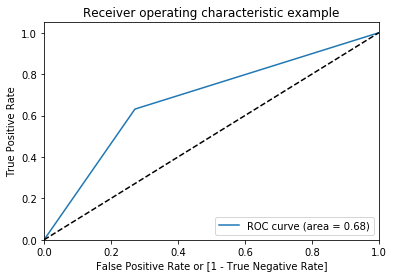

(array([0.        , 0.27137546, 1.        ]),
 array([0.        , 0.63120567, 1.        ]),
 array([2, 1, 0]))

In [256]:
draw_roc(y_under_test, f)

In [243]:
print(classification_report(y_under_test,f))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69      1076
           1       0.71      0.63      0.67      1128

   micro avg       0.68      0.68      0.68      2204
   macro avg       0.68      0.68      0.68      2204
weighted avg       0.68      0.68      0.68      2204



# Decision tree model (after sampling)

In [257]:
dec = DecisionTreeClassifier()
dec.fit(X_under_train,y_under_train)
y_dec_pred = dec.predict(X_under_test)

In [258]:
print(f1_score(y_under_test,y_dec_pred)*100)

61.99556541019956


In [260]:
confusion_tr = metrics.confusion_matrix(y_under_test,y_dec_pred)
confusion_tr

array([[648, 428],
       [429, 699]], dtype=int64)

In [261]:
TP_tr = confusion_tr[0,0] # true negative
TN_tr = confusion_tr[1,1] # true postive
FP_tr = confusion_tr[0,1] # false positives
FN_tr = confusion_tr[1,0] # false negatives

In [262]:
# Let's see the sensitivity of our tree model
TP_tr / float(TP_tr+FN_tr)

0.6016713091922006

In [263]:
# Calculate false postive rate 
print(FP_tr/ float(TN_tr+FP_tr))

0.3797692990239574


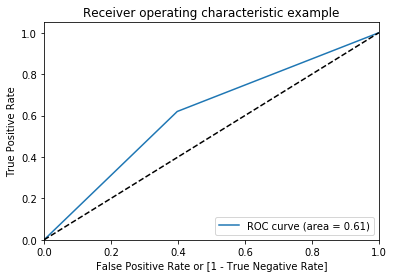

(array([0.        , 0.39776952, 1.        ]),
 array([0.        , 0.61968085, 1.        ]),
 array([2, 1, 0]))

In [264]:
draw_roc(y_under_test, y_dec_pred)

# Random forest model

In [265]:
rfmodel = RandomForestClassifier()
rfmodel.fit(X_under_train,y_under_train)
y_rf_pred = rfmodel.predict(X_under_test)

In [266]:
confusion_rf = metrics.confusion_matrix(y_under_test,y_rf_pred)
confusion_rf

array([[823, 253],
       [473, 655]], dtype=int64)

In [274]:
print(f1_score(y_under_test,y_rf_pred)*100)

64.3418467583497


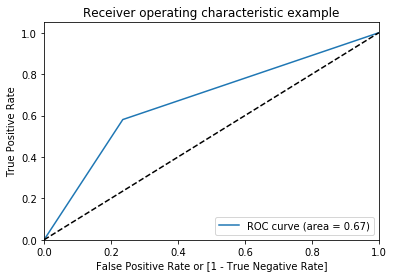

(array([0.        , 0.23513011, 1.        ]),
 array([0.        , 0.58067376, 1.        ]),
 array([2, 1, 0]))

In [268]:
draw_roc(y_under_test, y_rf_pred)

# xgboosting

In [269]:
model_xgb = xg.fit(X_under_train,y_under_train)
pred_xgb  = xg.predict(X_under_test)

In [271]:
print(f1_score(y_under_test,pred_xgb)*100)

66.39344262295083


In [272]:
confusion_xgb = metrics.confusion_matrix(y_under_test,pred_xgb)
confusion_xgb

array([[900, 176],
       [480, 648]], dtype=int64)

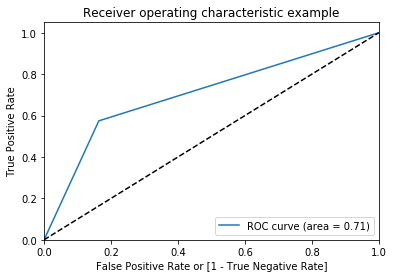

(array([0.        , 0.16356877, 1.        ]),
 array([0.        , 0.57446809, 1.        ]),
 array([2, 1, 0]))

In [273]:
draw_roc(y_under_test, pred_xgb)

# SUMMARY

### Base model result (after under sampling)
 
##                                   F1 SCORES          

### Logistic regression   -  65.44715447154472                                             

### Decision tree              -  61.99556541019956
 
### Random forest           -  64.3418467583497

### xgboosting                 -  66.39344262295083

### Base model result (after under sampling)
 
##                                   F1 SCORES (After tuning)

### Logistic regression   -   66.79174484052533

### Decision tree              -  
 
### Random forest           -  

### xgboosting                 -  

###                    ---------------------------------------------------------------------------------------------------- -------------------------------------   ###

# The most recent contacts

In [105]:
df_remaining = data[data['pdays'] != 999]
df_remaining.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24108,37,admin.,married,university.degree,no,yes,no,telephone,nov,wed,1,6,1,success,-0.1,93.2,-42.0,4.286,5195.8,no
24264,48,management,married,university.degree,no,yes,no,cellular,nov,mon,1,4,1,success,-0.1,93.2,-42.0,4.191,5195.8,no
24279,42,technician,married,professional.course,unknown,yes,no,cellular,nov,mon,1,4,1,success,-0.1,93.2,-42.0,4.191,5195.8,no
24397,50,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,1,3,1,success,-0.1,93.2,-42.0,4.191,5195.8,no
24482,36,self-employed,single,university.degree,no,yes,no,cellular,nov,mon,2,4,1,success,-0.1,93.2,-42.0,4.191,5195.8,no


In [106]:
df_remaining.shape

(1515, 20)

39673 people were not cantacted (999)

1515 people were contacted frequent intervals (non 999)

In [108]:
df_remaining['poutcome'].value_counts()

success    1373
failure     142
Name: poutcome, dtype: int64

Failure rate is less for group for people who were contacted recently.

In [109]:
df_remaining['y'].value_counts()

yes    967
no     548
Name: y, dtype: int64

# For people whom the days passed by is less, the success rate is higher than failure rate

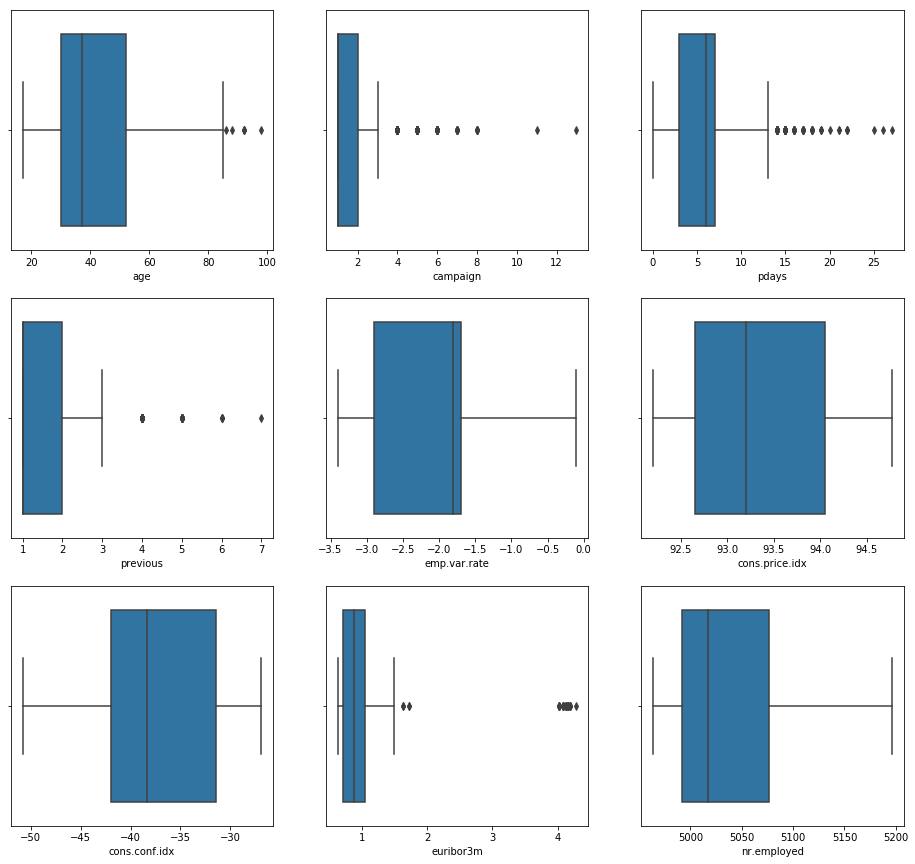

In [110]:
fig , axes = plt.subplots(3,3,figsize =(16,15))
sns.boxplot(df_remaining['age'],ax = axes[0,0])
sns.boxplot(df_remaining['campaign'],ax = axes[0,1])
sns.boxplot(df_remaining['pdays'],ax = axes[0,2])
sns.boxplot(df_remaining['previous'],ax = axes[1,0])
sns.boxplot(df_remaining['emp.var.rate'],ax = axes[1,1])
sns.boxplot(df_remaining['cons.price.idx'],ax = axes[1,2])
sns.boxplot(df_remaining['cons.conf.idx'],ax = axes[2,0])
sns.boxplot(df_remaining['euribor3m'],ax = axes[2,1])
sns.boxplot(df_remaining['nr.employed'],ax = axes[2,2])
plt.show()

In [111]:
e = pd.crosstab(df_remaining['default'],df_remaining['y'])
e

y,no,yes
default,,
no,514,937
unknown,34,30


In [112]:
new_copy = df_remaining.copy()

In [113]:
new_copy.shape

(1515, 20)

In [114]:
new = pd.get_dummies(new_copy,drop_first=True)
new.shape

(1515, 51)

In [115]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1515 entries, 24108 to 41182
Data columns (total 51 columns):
age                              1515 non-null int64
campaign                         1515 non-null int64
pdays                            1515 non-null int64
previous                         1515 non-null int64
emp.var.rate                     1515 non-null float64
cons.price.idx                   1515 non-null float64
cons.conf.idx                    1515 non-null float64
euribor3m                        1515 non-null float64
nr.employed                      1515 non-null float64
job_blue-collar                  1515 non-null uint8
job_entrepreneur                 1515 non-null uint8
job_housemaid                    1515 non-null uint8
job_management                   1515 non-null uint8
job_retired                      1515 non-null uint8
job_self-employed                1515 non-null uint8
job_services                     1515 non-null uint8
job_student                   

# x and y

In [116]:
x = new.drop('y_yes',1)
y = new['y_yes']

# model fitting

In [117]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100,stratify=y)

In [118]:
x_train_new.shape

(1060, 50)

In [119]:
x_test_new.shape

(455, 50)

In [120]:
log = LogisticRegression()
m_log = lo.fit(x_train_new,y_train_new)
p_log = lo.predict(x_test_new)

In [121]:
print(f1_score(y_test_new,p_log))

0.7751937984496124


In [122]:
log_cmx = metrics.confusion_matrix(y_test_new,p_log)
log_cmx

array([[ 60, 105],
       [ 40, 250]], dtype=int64)

In [123]:
40/105

0.38095238095238093

In [124]:
TN_log= log_cmx[0,0] # true negative
TP_log = log_cmx[1,1] # true postive
FP_log = log_cmx[0,1] # false positives
FN_log = log_cmx[1,0] # false negatives

In [125]:
accuracy_final = (TP_log+TN_log)/(TP_log+TN_log+FP_log+FN_log)
print(accuracy_final)

0.6813186813186813


In [126]:
missclassify = 1-accuracy_final
missclassify

0.31868131868131866

In [127]:
print(classification_report(y_test_new,p_log))

              precision    recall  f1-score   support

           0       0.60      0.36      0.45       165
           1       0.70      0.86      0.78       290

   micro avg       0.68      0.68      0.68       455
   macro avg       0.65      0.61      0.61       455
weighted avg       0.67      0.68      0.66       455



# auc and roc

In [128]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

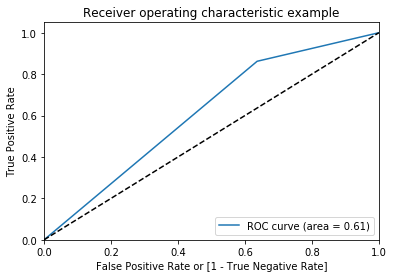

(array([0.        , 0.63636364, 1.        ]),
 array([0.        , 0.86206897, 1.        ]),
 array([2, 1, 0]))

In [129]:
draw_roc(y_test_new, p_log)

# Decision tree

In [130]:
tree = DecisionTreeClassifier()
model_tre_f = tree.fit(x_train_new,y_train_new)
pred_tree_f  = tree.predict(x_test_new)

In [131]:
print(f1_score(y_test_new,pred_tree_f))

0.68760907504363


In [132]:
confusion_tree_ = metrics.confusion_matrix(y_test_new,pred_tree_f)
confusion_tree_

array([[ 79,  86],
       [ 93, 197]], dtype=int64)

In [133]:
TN_tree= confusion_tree_[0,0] # true negative
TP_tree = confusion_tree_[1,1] # true postive
FP_tree = confusion_tree_[0,1] # false positives
FN_tree = confusion_tree_[1,0] # false negatives

In [134]:
accuracy_final_tree = (TP_tree+TN_tree)/(TP_tree+TN_tree+FP_tree+FN_tree)
print(accuracy_final_tree)

0.6065934065934065


In [135]:
missclassify_tree = 1-accuracy_final_tree
missclassify_tree

0.39340659340659345

In [136]:
print(classification_report(y_test_new,pred_tree_f))

              precision    recall  f1-score   support

           0       0.46      0.48      0.47       165
           1       0.70      0.68      0.69       290

   micro avg       0.61      0.61      0.61       455
   macro avg       0.58      0.58      0.58       455
weighted avg       0.61      0.61      0.61       455



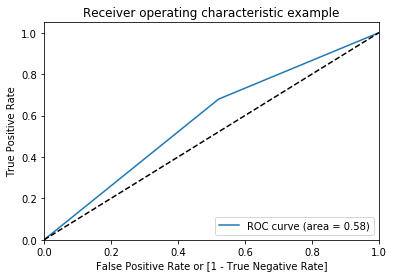

(array([0.        , 0.52121212, 1.        ]),
 array([0.        , 0.67931034, 1.        ]),
 array([2, 1, 0]))

In [137]:
draw_roc(y_test_new, pred_tree_f)

# random forest  

In [138]:
random = RandomForestClassifier()
model_rf_f = random.fit(x_train_new,y_train_new)
pred_rf_f  = random.predict(x_test_new)

In [139]:
print(f1_score(y_test_new,pred_rf_f))

0.7160068846815835


In [140]:
confusion_rf_ = metrics.confusion_matrix(y_test_new,pred_rf_f)
confusion_rf_

array([[ 82,  83],
       [ 82, 208]], dtype=int64)

In [141]:
TN_rf= confusion_rf_[0,0] # true negative
TP_rf = confusion_rf_[1,1] # true postive
FP_rf = confusion_rf_[0,1] # false positives
FN_rf = confusion_rf_[1,0] # false negatives

In [142]:
accuracy_final_rf = (TP_rf+TN_rf)/(TP_rf+TN_rf+FP_rf+FN_rf)
print(accuracy_final_rf)

0.6373626373626373


In [143]:
missclassify_rf = 1-accuracy_final_rf
missclassify_rf

0.3626373626373627

In [144]:
print(classification_report(y_test_new,pred_rf_f))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50       165
           1       0.71      0.72      0.72       290

   micro avg       0.64      0.64      0.64       455
   macro avg       0.61      0.61      0.61       455
weighted avg       0.64      0.64      0.64       455



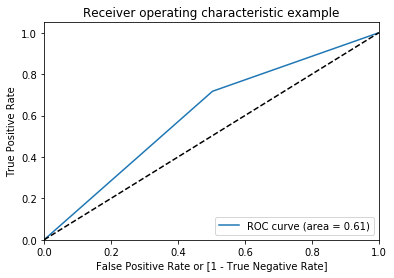

(array([0.       , 0.5030303, 1.       ]),
 array([0.        , 0.71724138, 1.        ]),
 array([2, 1, 0]))

In [275]:
draw_roc(y_test_new, pred_rf_f)

# Xgboosting

In [276]:
model_xgb_new = xg.fit(x_train_new,y_train_new)
pred_xgb_new  = xg.predict(x_test_new)

In [278]:
print(f1_score(y_test_new,pred_xgb_new)*100)

77.69110764430579


In [280]:
co_xg_new = metrics.confusion_matrix(y_test_new,pred_xgb_new)
co_xg_new

array([[ 63, 102],
       [ 41, 249]], dtype=int64)

In [281]:
TP_xg = co_xg_new[0,0] # true negative
TN_xg = co_xg_new[1,1] # true postive
FP_xg = co_xg_new[0,1] # false positives
FN_xg = co_xg_new[1,0] # false negatives

In [283]:
# Let's see the sensitivity of our tree model
TP_xg / float(TP_xg+FN_xg)

0.6057692307692307

In [284]:
# Calculate false postive rate 
print(FP_xg/ float(TN_xg+FP_xg))

0.2905982905982906


# summary of base models (for people whom contacted recently)

Logistic classifier
                  
                  f1 score - 0.7751937984496124
Decision tree
                  
                  f1 score - 0.6818181818181818
Random forest
                  
                  f1 score - 0.7
XGBOOSTING

                  f1 score - 0.7769110764430579